In [2]:
import os
import shutil
import pandas as pd
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Paths configuration

# PATH_ROOT = "/media/tom-ratsakatika/CRUCIAL 4TB/FCC Camera Trap Data"
PATH_ROOT = "/home/tom-ratsakatika/VSCode/camera-traps/data/"

labelled_data_path = '../data/manual_labelling/fcc_spreadsheet_df_labels_ground_truth.xlsx'

df = pd.read_excel(labelled_data_path, sheet_name='structured_data')

df.head()

,Sort,Session,Category,GMU,TrapSite,Longitude,Latitude,Altitude,StartDate,EndDate,...,score,count,humanpresence,FCC_Master_Class,DF(base)_Master_Class,DF(sequence)_Master_Class,FCC_DF(base)_Match,FCC_DF(sequence)_Match,DF(base)_DF(sequence)_Match,Ground_Truth
0,9,1,Systematic monitoring of lynx,34SercaitaBV,Ohaba,25.161698,45.732235,600,2018-02-08,2018-04-09,...,0.97,1,0,Fox,Fox,Fox,True,True,True,Fox
1,9,1,Systematic monitoring of lynx,34SercaitaBV,Ohaba,25.161698,45.732235,600,2018-02-08,2018-04-09,...,0.97,1,0,Fox,Fox,Fox,True,True,True,Fox
2,10,1,Systematic monitoring of lynx,34SercaitaBV,Ohaba,25.161698,45.732235,600,2018-02-08,2018-04-09,...,1.00,0,0,Unknown,Empty**,Empty**,False,False,True,Unknown
3,11,1,Systematic monitoring of lynx,34SercaitaBV,Ohaba,25.161698,45.732235,600,2018-02-08,2018-04-09,...,0.97,0,0,Fox,Empty**,Fox,False,True,False,Fox
4,11,1,Systematic monitoring of lynx,34SercaitaBV,Ohaba,25.161698,45.732235,600,2018-02-08,2018-04-09,...,0.97,1,0,Fox,Fox,Fox,True,True,True,Fox


In [3]:
# List of priority species
priority_species = ['Wild boar', 'Wolf', 'Lynx', 'Bear']

# Filter the DataFrame for priority species
filtered_df = df[df['Ground_Truth'].isin(priority_species)]

# Analyze distribution by TrapSite
species_by_trapsite = filtered_df.groupby(['TrapSite', 'Ground_Truth']).size().unstack(fill_value=0)
print("Species distribution by TrapSite:")
print(species_by_trapsite)

# Analyze distribution by Camera ID
species_by_camera = filtered_df.groupby(['Camera ID', 'Ground_Truth']).size().unstack(fill_value=0)
print("\nSpecies distribution by Camera ID:")
print(species_by_camera)

# Analyze distribution by Day/Night
species_by_daynight = filtered_df.groupby(['Day/Night', 'Ground_Truth']).size().unstack(fill_value=0)
print("\nSpecies distribution by Day/Night:")
print(species_by_daynight)

# Analyze distribution by Image Quality
species_by_quality = filtered_df.groupby(['Image quality', 'Ground_Truth']).size().unstack(fill_value=0)
print("\nSpecies distribution by Image Quality:")
print(species_by_quality)


Species distribution by TrapSite:
Ground_Truth               Bear  Lynx  Wild boar  Wolf
TrapSite                                              
201_ValeaUrsului             47     0          0     0
257_Stramba                   6     0          0     0
25_ColtulSoimului             5     0          0     0
270_PisculCalului            24     3          3    10
271_PisculCalului            43     0          7    16
...                         ...   ...        ...   ...
Valea Vladusca_Suchelnita     2    12          2     9
Valea lui Andreas             1     1          0     0
Valea marului                 0     0          1     0
ValeaBughita_Albesti          0    17          0     0
Vladului                      1     0          0     1

[183 rows x 4 columns]

Species distribution by Camera ID:
Ground_Truth  Bear  Lynx  Wild boar  Wolf
Camera ID                                
CC013X          68    17         29     4
CC0140           1     1         10     0
CC0142          14     

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(species_by_trapsite)


Ground_Truth                               Bear  Lynx  Wild boar  Wolf
TrapSite                                                              
201_ValeaUrsului                             47     0          0     0
257_Stramba                                   6     0          0     0
25_ColtulSoimului                             5     0          0     0
270_PisculCalului                            24     3          3    10
271_PisculCalului                            43     0          7    16
281_PisculCalului                             7     1          2    10
283_PisculCalului                            34     0          0     2
287_Comisu                                    2     0         12     1
292_Berevoiu Mic                             19     0         50     0
293_PisculCalului                            10     2          0     0
296_PisculCalului                             6     0          0     0
Amplast                                       1     2          6     0
Andrei

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

# Define a function to determine the season based on month
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the function to create a new 'Season' column
df['Season'] = df['Date'].apply(get_season)

# List of priority species
priority_species = ['Wild boar', 'Wolf', 'Lynx', 'Bear']

# Filter the DataFrame for priority species
filtered_df = df[df['Ground_Truth'].isin(priority_species)]

# Analyze distribution by Season
species_by_season = filtered_df.groupby(['Season', 'Ground_Truth']).size().unstack(fill_value=0)
print("Species occurrences by Season:")
print(species_by_season)


# Calculate total images per season
total_images_per_season = df.groupby('Season').size()

# Calculate the proportion of each species occurrences as a percentage of total images taken in these seasons
species_proportion_by_season = (species_by_season.div(total_images_per_season, axis=0) * 100).fillna(0)

print("\nSpecies occurrences as a percentage of total images by Season:")
print(species_proportion_by_season.round(2))



Species occurrences by Season:
Ground_Truth  Bear  Lynx  Wild boar  Wolf
Season                                   
Autumn        1280   117       1056   112
Spring         992   598        927   172
Summer         427     5        437    30
Winter         237   427        873   296

Species occurrences as a percentage of total images by Season:
Ground_Truth   Bear   Lynx  Wild boar  Wolf
Season                                     
Autumn        19.43   1.78      16.03  1.70
Spring        17.42  10.50      16.27  3.02
Summer        22.65   0.27      23.18  1.59
Winter         4.37   7.87      16.09  5.45


/tmp/ipykernel_7944/963210513.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].text(idx, value + 1, f'{filtered_animal_captures[idx]:.0f}', ha='center', va='bottom', fontsize=8, rotation=90)
/tmp/ipykernel_7944/963210513.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].text(idx, value + 1, f'{filtered_animal_captures[idx]:.0f}', ha='center', va='bottom', fontsize=8, rotation=90)


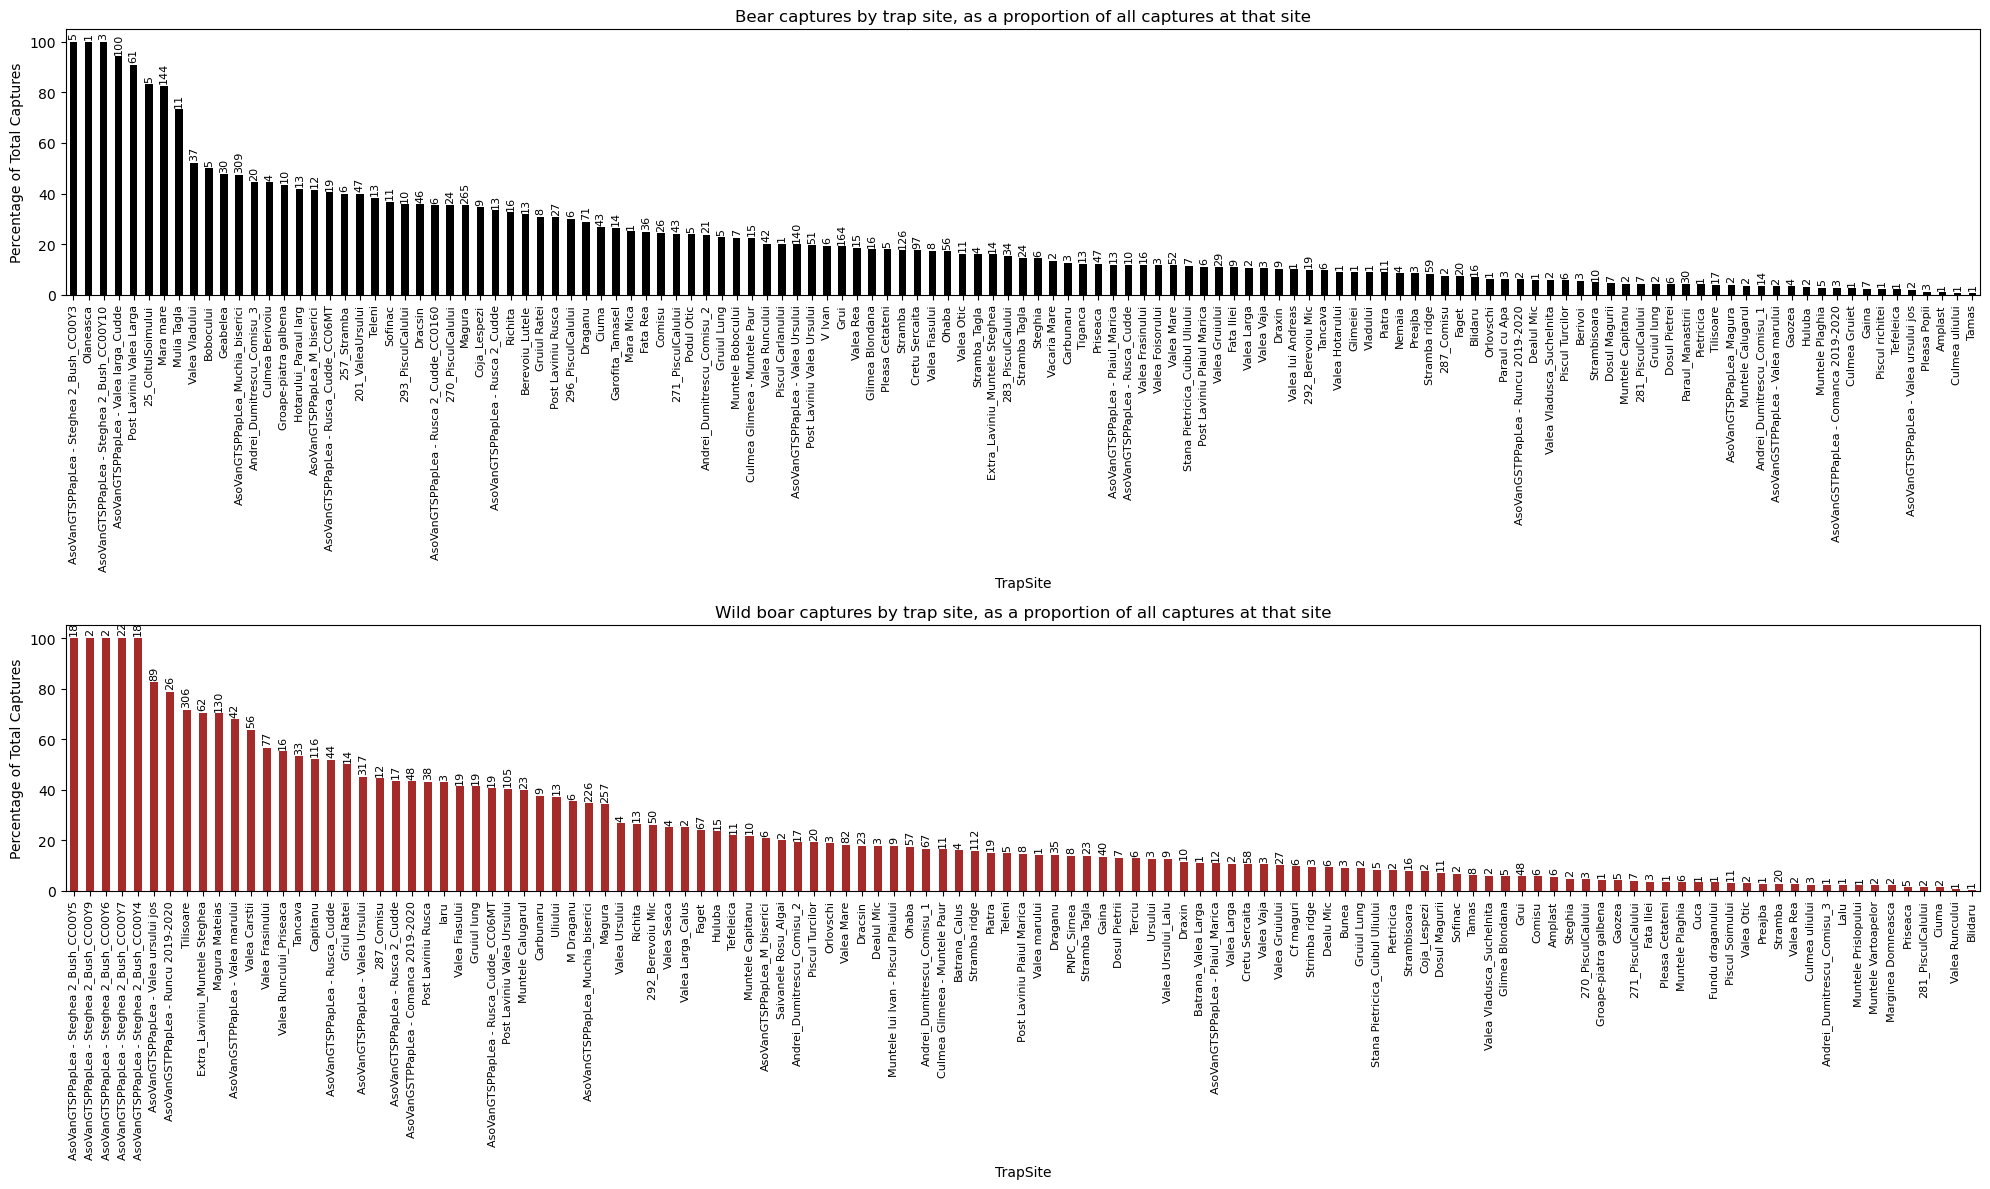

In [13]:
import matplotlib.pyplot as plt

animals = ["Bear", "Wild boar"]
fig, axes = plt.subplots(2, 1, figsize=(20, 12))

for i, animal in enumerate(animals):
    # Calculate total captures per TrapSite
    total_captures = df.groupby('TrapSite').size()

    # Filter the DataFrame for the current animal only and calculate captures per TrapSite
    animal_captures = df[df['Ground_Truth'] == animal].groupby('TrapSite').size()

    # Calculate the proportion of the current animal captures
    animal_proportion = (animal_captures / total_captures) * 100

    # Filter for proportions greater than 0%
    high_animal_proportion = animal_proportion[animal_proportion > 0]

    # Sort the proportions for better visualization
    high_animal_proportion = high_animal_proportion.sort_values(ascending=False)

    # Get corresponding counts of the current animal for the filtered sites
    filtered_animal_captures = animal_captures[high_animal_proportion.index]

    # Plotting on the respective subplot
    high_animal_proportion.plot(kind='bar', color='brown' if animal == "Wild boar" else 'black', ax=axes[i])
    axes[i].set_title(f'{animal} captures by trap site, as a proportion of all captures at that site')
    axes[i].set_xlabel('TrapSite')
    axes[i].set_ylabel('Percentage of Total Captures')
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)

    # Annotate bars with the absolute number of captures
    for idx, value in enumerate(high_animal_proportion):
        axes[i].text(idx, value + 1, f'{filtered_animal_captures[idx]:.0f}', ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()


/tmp/ipykernel_7944/2486953746.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].text(idx, value + 1, f'{filtered_animal_captures[idx]:.0f}', ha='center', va='bottom', fontsize=8, rotation=90)
/tmp/ipykernel_7944/2486953746.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].text(idx, value + 1, f'{filtered_animal_captures[idx]:.0f}', ha='center', va='bottom', fontsize=8, rotation=90)


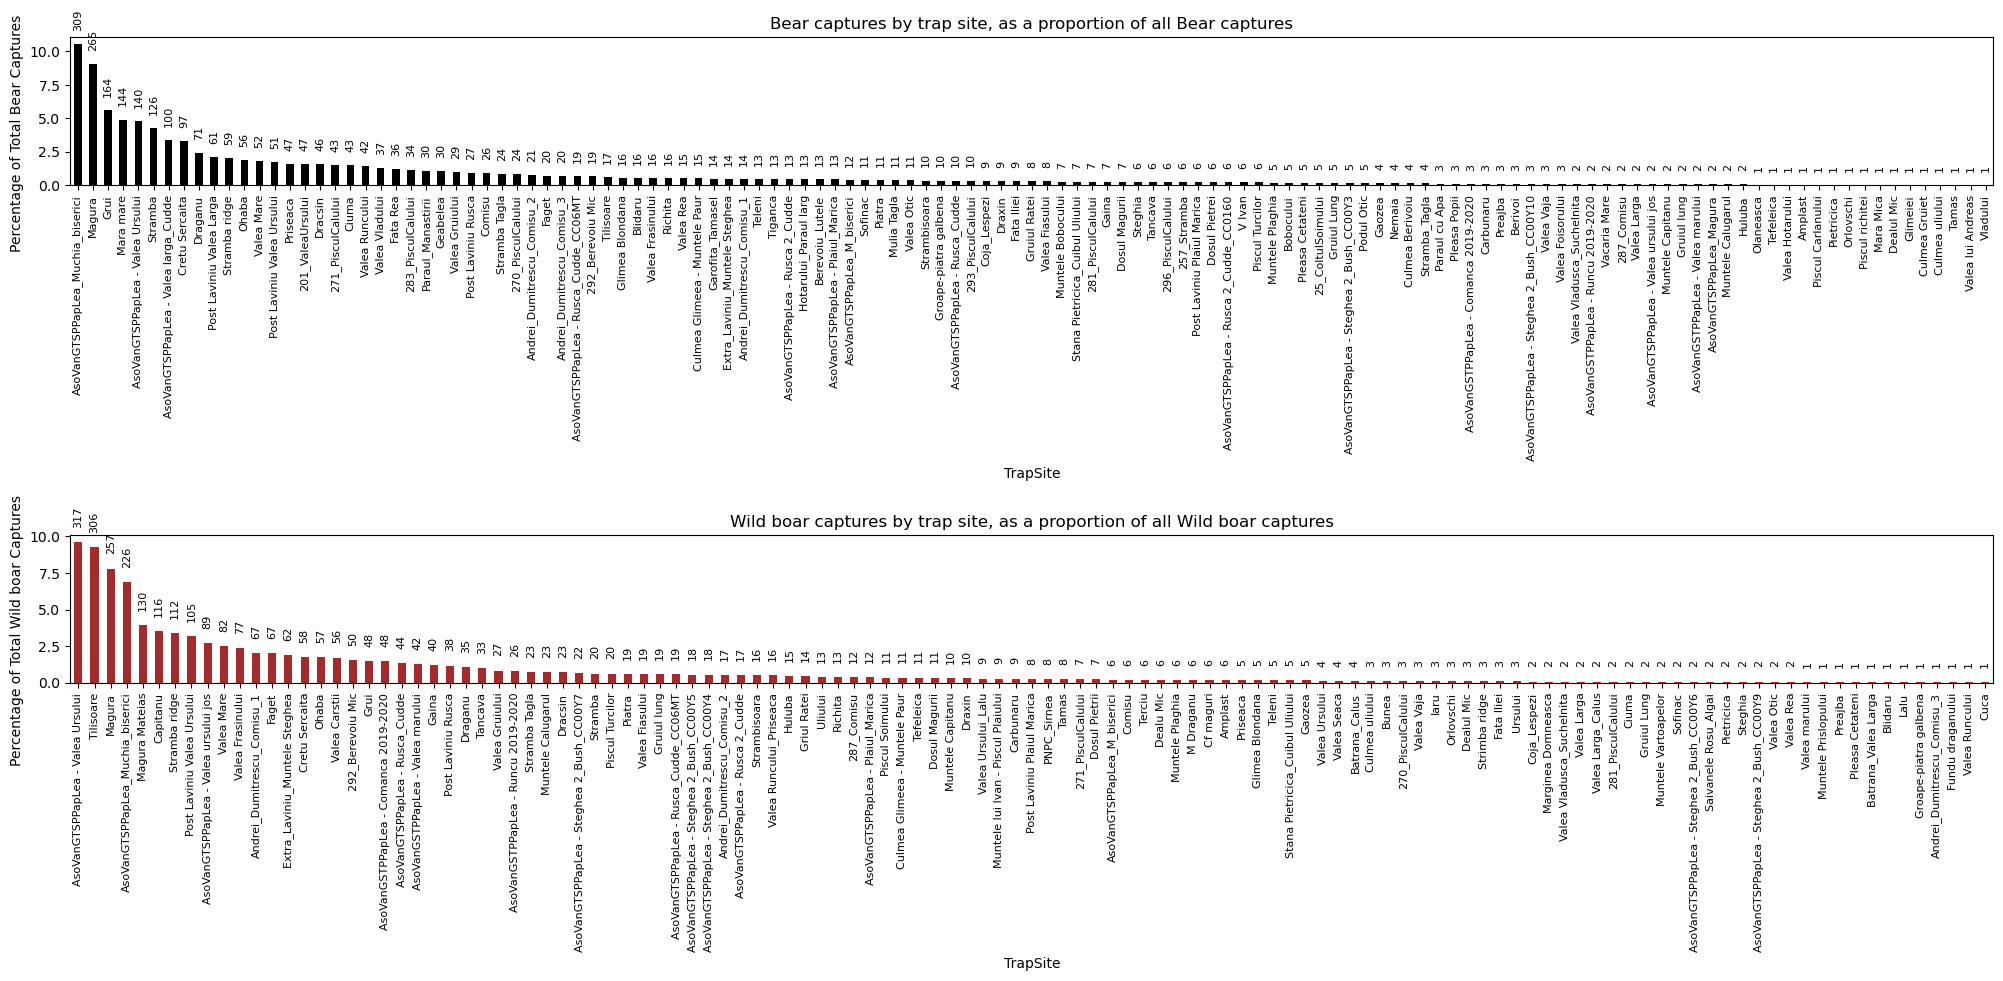

In [15]:
import matplotlib.pyplot as plt

animals = ["Bear", "Wild boar"]
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

for i, animal in enumerate(animals):
    # Calculate total captures per TrapSite
    total_captures = df.groupby('TrapSite').size()

    # Filter the DataFrame for the current animal only and calculate captures per TrapSite
    animal_captures = df[df['Ground_Truth'] == animal].groupby('TrapSite').size()

    # Calculate total captures for the current animal across all TrapSites
    total_animal_captures = animal_captures.sum()

    # Calculate the proportion of the current animal captures as a percentage of total captures
    animal_proportion = (animal_captures / total_animal_captures) * 100

    # Filter for proportions greater than 0%
    high_animal_proportion = animal_proportion[animal_proportion > 0]

    # Sort the proportions for better visualization
    high_animal_proportion = high_animal_proportion.sort_values(ascending=False)

    # Get corresponding counts of the current animal for the filtered sites
    filtered_animal_captures = animal_captures[high_animal_proportion.index]

    # Plotting on the respective subplot
    high_animal_proportion.plot(kind='bar', color='brown' if animal == "Wild boar" else 'black', ax=axes[i])
    axes[i].set_title(f'{animal} captures by trap site, as a proportion of all {animal} captures')
    axes[i].set_xlabel('TrapSite')
    axes[i].set_ylabel(f'Percentage of Total {animal} Captures          ')
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)

    # Annotate bars with the absolute number of captures
    for idx, value in enumerate(high_animal_proportion):
        axes[i].text(idx, value + 1, f'{filtered_animal_captures[idx]:.0f}', ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()


In [8]:
df.columns

Index(['Sort', 'Session', 'Category', 'GMU', 'TrapSite', 'Longitude',
       'Latitude', 'Altitude', 'StartDate', 'EndDate', 'TrapCode', 'Camera',
       'Type', 'Date', 'Time', 'RawName', 'Species', 'NoAnimals', 'Sex',
       'Image quality', 'Problem', 'Sequence', 'Comments', 'Formatted Date',
       'Formatted Time', 'MatchID', 'File ID', 'Original Path',
       'Original Filename', 'File Extension', 'Original Date', 'Original Time',
       'Camera Brand', 'Color Space', 'Flash Used', 'Flash Info', 'Day/Night',
       'Camera ID', 'Sunrise', 'Sunset', 'Full File Name', 'date', 'seqnum',
       'seqcount', 'predictionbase', 'scorebase', 'prediction', 'score',
       'count', 'humanpresence', 'FCC_Master_Class', 'DF(base)_Master_Class',
       'DF(sequence)_Master_Class', 'FCC_DF(base)_Match',
       'FCC_DF(sequence)_Match', 'DF(base)_DF(sequence)_Match', 'Ground_Truth',
       'Season'],
      dtype='object')

In [19]:
import pandas as pd

# Assuming df is your dataframe
# Group by the 'Sort' column and count the size of each group
sequence_counts = df.groupby('Sort').size()

# Filter sequences with more than one image
multi_image_sequences = sequence_counts[sequence_counts > 1]

# Sum the counts of images in these sequences
num_images_in_multi_image_sequences = multi_image_sequences.sum()

# Calculate the total number of images
total_images = len(df)

# Calculate the percentage
percentage_of_images_in_multi_image_sequences = (num_images_in_multi_image_sequences / total_images) * 100

percentage_of_images_in_multi_image_sequences

print("Number of images in multi-image sequences:", num_images_in_multi_image_sequences)
print(f"Percentage of images in multi-image sequences: {percentage_of_images_in_multi_image_sequences:.2f}%")



Number of images in multi-image sequences: 15121
Percentage of images in multi-image sequences: 77.16%
